In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv("wine (1).csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
df['Wine'].unique()

array([1, 2, 3])

In [23]:
df.shape

(178, 14)

In [24]:
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [25]:
X=df.drop('Wine',axis=1)
Y=df['Wine']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [27]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,Y_train)
mutual_info

array([0.41544673, 0.27511638, 0.11290299, 0.16676234, 0.18759114,
       0.41499032, 0.69708886, 0.12858201, 0.25766544, 0.56849843,
       0.44096112, 0.52445549, 0.54064289])

In [28]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.697089
Color.int               0.568498
Proline                 0.540643
OD                      0.524455
Hue                     0.440961
Alcohol                 0.415447
Phenols                 0.414990
Malic.acid              0.275116
Proanth                 0.257665
Mg                      0.187591
Acl                     0.166762
Nonflavanoid.phenols    0.128582
Ash                     0.112903
dtype: float64

<AxesSubplot: >

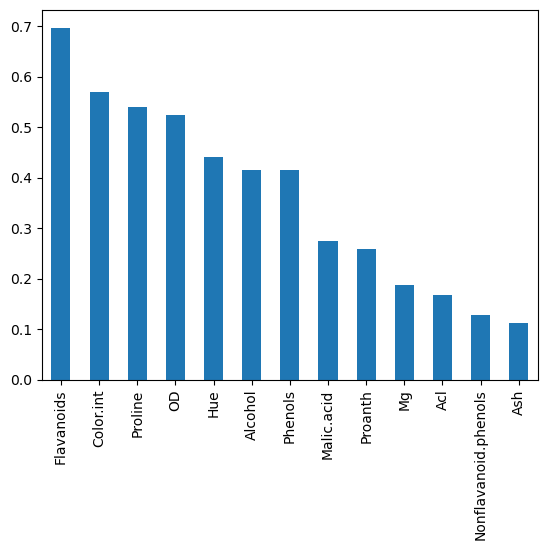

In [30]:
mutual_info.sort_values(ascending=False).plot.bar()

In [34]:
from sklearn.feature_selection import SelectKBest
sel_five_columns=SelectKBest(mutual_info_classif,k=5)
sel_five_columns.fit(X_train,Y_train)
X_train.columns[sel_five_columns.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')